Dataset Loaded Successfully
Shape: (20640, 8)

Model Performance Comparison:

               Model      RMSE  R2 Score
0  Linear Regression  0.745581  0.575788
1   Ridge Regression  0.745557  0.575816
2      Decision Tree  0.724234  0.599732


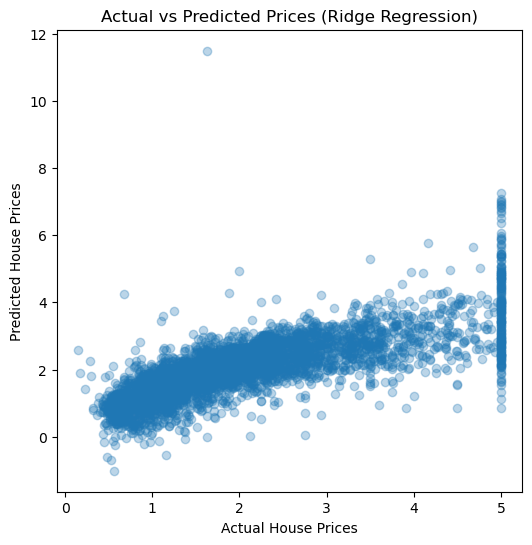


Conclusion:
- Feature scaling improved linear model performance.
- Ridge Regression performed better due to regularization.
- Decision Tree showed good accuracy but may overfit.
- Ridge Regression is selected as the best model.



In [2]:
#AI & ML – Task 2
#Feature Engineering, Model Optimization & Performance Comparison

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Load Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("Dataset Loaded Successfully")
print("Shape:", X.shape)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Models
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

#Evaluation Function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2

#Evaluate Models
lr_rmse, lr_r2 = evaluate_model(linear_model, X_test_scaled, y_test)
ridge_rmse, ridge_r2 = evaluate_model(ridge_model, X_test_scaled, y_test)
tree_rmse, tree_r2 = evaluate_model(tree_model, X_test, y_test)

#Results
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree"],
    "RMSE": [lr_rmse, ridge_rmse, tree_rmse],
    "R2 Score": [lr_r2, ridge_r2, tree_r2]
})

print("\nModel Performance Comparison:\n")
print(results)

#Visualization (Best Model - Ridge Regression)
best_predictions = ridge_model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, best_predictions, alpha=0.3)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Ridge Regression)")
plt.show()

print("""
Conclusion:
- Feature scaling improved linear model performance.
- Ridge Regression performed better due to regularization.
- Decision Tree showed good accuracy but may overfit.
- Ridge Regression is selected as the best model.
""")